<a href="https://colab.research.google.com/github/vovsiienko/IT496_Course_acitvities/blob/master/IT496_ViktoriiaO_Evaluation_ex_2_VendorSelecteion%26Radar_Spider_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import math

#create a dataframe for our alternative analysis matrix
AA=pd.DataFrame(columns=['criteria', 'weight', 'ratingA', 'ratingB', 'scoreA', 'scoreB'])
print(AA)

Empty DataFrame
Columns: [criteria, weight, ratingA, ratingB, scoreA, scoreB]
Index: []


In [10]:
#first step :add a list of criteria
AA['criteria']=['Cost', 'Scalability', 'Security features', 'Customization option', 'Maintenance cost', 'Service level options', 'In-house support capabilities', 'Integration with current services', 'Data sources compatibilities' ]

print(AA)

                            criteria weight ratingA ratingB scoreA scoreB
0                               Cost    NaN     NaN     NaN    NaN    NaN
1                        Scalability    NaN     NaN     NaN    NaN    NaN
2                  Security features    NaN     NaN     NaN    NaN    NaN
3               Customization option    NaN     NaN     NaN    NaN    NaN
4                   Maintenance cost    NaN     NaN     NaN    NaN    NaN
5              Service level options    NaN     NaN     NaN    NaN    NaN
6      In-house support capabilities    NaN     NaN     NaN    NaN    NaN
7  Integration with current services    NaN     NaN     NaN    NaN    NaN
8       Data sources compatibilities    NaN     NaN     NaN    NaN    NaN


In [11]:
#second step: identify weights
#weights show relative importance of each criterion
#they must add up to 1 (or 100 if you use percentages)
AA['weight']=[0.2, 0.08, 0.15, 0.07, 0.12, 0.08, 0.16, 0.15, 0.09]

print(AA)

                            criteria  weight ratingA ratingB scoreA scoreB
0                               Cost    0.20     NaN     NaN    NaN    NaN
1                        Scalability    0.08     NaN     NaN    NaN    NaN
2                  Security features    0.15     NaN     NaN    NaN    NaN
3               Customization option    0.07     NaN     NaN    NaN    NaN
4                   Maintenance cost    0.12     NaN     NaN    NaN    NaN
5              Service level options    0.08     NaN     NaN    NaN    NaN
6      In-house support capabilities    0.16     NaN     NaN    NaN    NaN
7  Integration with current services    0.15     NaN     NaN    NaN    NaN
8       Data sources compatibilities    0.09     NaN     NaN    NaN    NaN


In [12]:
from pandas.core.indexes.range import RangeIndex
#step 3: rate each alternative across all criteria
#choose a scale: 1-5 or 1-7 or 1-10
#higher number: al alternative is doing better regarding a given criterion

AA['ratingA']=[5,6,7,9,8,4,6,3,7]
AA['ratingB']=[7,4,7,3,2,8,6,6,4]
print(AA)

                            criteria  weight  ratingA  ratingB scoreA scoreB
0                               Cost    0.20        5        7    NaN    NaN
1                        Scalability    0.08        6        4    NaN    NaN
2                  Security features    0.15        7        7    NaN    NaN
3               Customization option    0.07        9        3    NaN    NaN
4                   Maintenance cost    0.12        8        2    NaN    NaN
5              Service level options    0.08        4        8    NaN    NaN
6      In-house support capabilities    0.16        6        6    NaN    NaN
7  Integration with current services    0.15        3        6    NaN    NaN
8       Data sources compatibilities    0.09        7        4    NaN    NaN


In [13]:
#step 4: calculate partial score by multiplying weight * rating
for index, row in AA.iterrows():
  AA['scoreA'][index]=row['ratingA']*row['weight']
  AA['scoreB'][index]=row['ratingB']*row['weight']
print(AA)

                            criteria  weight  ratingA  ratingB scoreA scoreB
0                               Cost    0.20        5        7    1.0    1.4
1                        Scalability    0.08        6        4   0.48   0.32
2                  Security features    0.15        7        7   1.05   1.05
3               Customization option    0.07        9        3   0.63   0.21
4                   Maintenance cost    0.12        8        2   0.96   0.24
5              Service level options    0.08        4        8   0.32   0.64
6      In-house support capabilities    0.16        6        6   0.96   0.96
7  Integration with current services    0.15        3        6   0.45    0.9
8       Data sources compatibilities    0.09        7        4   0.63   0.36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
#step 5: add parttial scores to get the total scores
#which solution is the winner? The one with the highest total score

totalScoreA=0
totalScoreB=0

for index,row in AA.iterrows():
  totalScoreA+=row['scoreA']
  totalScoreB+=row['scoreB']

print('the total score for A is {:.2f} and for B is {:2f}'.format(totalScoreA, totalScoreB))


the total score for A is 6.48 and for B is 6.080000


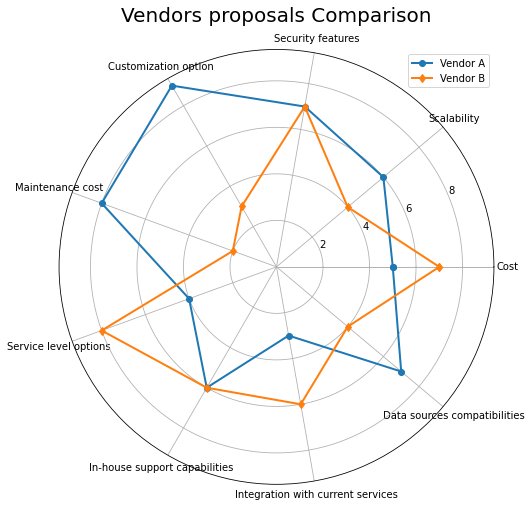

In [17]:
import numpy as np
import matplotlib.pyplot as plt

axisLocations = np.linspace(start=0, stop=2*np.pi, num=len(AA['ratingA']), endpoint=False)
axisLocations = np.concatenate((axisLocations,[axisLocations[0]]))
ratingsA=AA['ratingA']
ratingsB=AA['ratingB']

ratingsACircular=np.concatenate((ratingsA,[ratingsA[0]]))
ratingsBCircular=np.concatenate((ratingsB,[ratingsB[0]]))

plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(axisLocations, ratingsACircular, 'o-', linewidth=2, label="Vendor A")
plt.plot(axisLocations, ratingsBCircular, 'd-', linewidth=2, label="Vendor B")
#plt.plot(label_loc, restarant_3, laber='Restaurant 3)
plt.title('Vendors proposals Comparison', size=20)
lines,labels=plt.thetagrids(np.degrees(axisLocations), labels=AA['criteria'])
plt.legend()
plt.show()